# Midterm project 5.6
Flow Cytometry


# Step 1: Load the Data set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving flowCytometry.npy to flowCytometry.npy


Data set interpretation: there are 569 values with x<0, this is likely measurment noise, meaning we need to define a positive only array


In [ ]:
import pandas as pd

x = np.load("/content/flowCytometry.npy")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Keep only positive values (fluorescence cannot be 0 or negative)
x = x[x > 0]

Step 2: Plot a histogram


In [ ]:


# Check the number of data points
print("Number of cells:", len(x))

# Look at the first 10 values
print("First 10 fluorescence values:", x[:10])


Number of cells: 8751
First 10 fluorescence values: [2113.37231     272.828949   1542.6012     1262.26514       8.17493534
   65.8033295   112.149071   1360.77893    1252.06921    1020.34015   ]


In [ ]:
x_pos = x

We interpreted our dataset by utilizing 2 varying graphs. The first was by use of a linear scale, and the second by use of a log10 scale

# Step 3: compute and mark the median

In [ ]:
# Compute the median (Problem 5.1)
median_x = np.median(x)
print("Median fluorescence (linear scale):", median_x)

Median fluorescence (linear scale): 434.173523


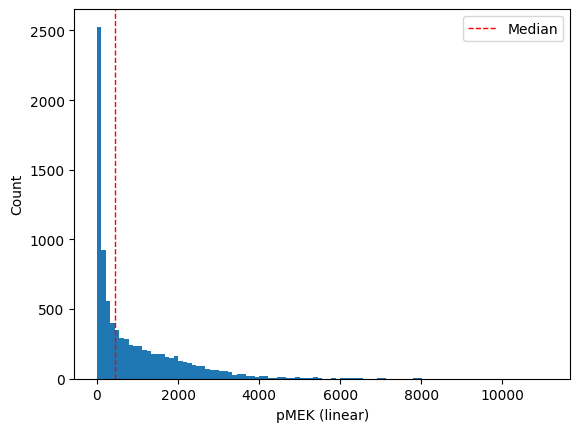

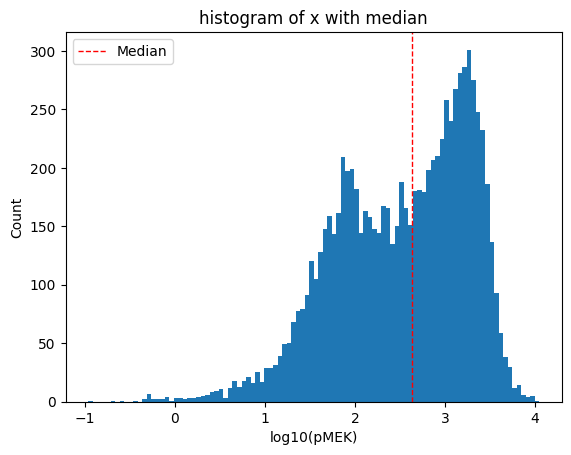

In [ ]:
plt.figure()
plt.hist(x_pos, bins=100)
plt.xlabel("pMEK (linear)")
plt.ylabel("Count")
plt.axvline(median_x, color='red', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()

plt.figure()
plt.hist(np.log10(x_pos), bins=100)
plt.xlabel("log10(pMEK)")
plt.ylabel("Count")
plt.axvline(np.log10(median_x), color='red', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.title("histogram of x with median")
plt.show()

In the linear plot you see a dominant maximum close to the left edge.


For the log plot, log is undefined for x<0 and flow data points are typically plotted on a log scale because the measurments span orders of magnitude

The vertical line at the median in Log space is the same as the median for the linear plot, the median represents a 50/50 split of cells, the visual position changes due to the axis change.

## Step 4: Identify Maxima

In [ ]:
counts_x, edges_x = np.histogram(x_pos, bins=100)

**Reasoning**:
The subtask requires identifying local maxima in the `counts_x` array by comparing each element with its immediate neighbors. This logic will be implemented in a code block.



In [ ]:
maxima_indices = []
for i in range(1, len(counts_x) - 1):
    if counts_x[i] > counts_x[i-1] and counts_x[i] > counts_x[i+1]:
        maxima_indices.append(i)

print("Indices of local maxima in counts_x:", maxima_indices)

Indices of local maxima in counts_x: [17, 31, 34, 37, 40, 44, 46, 48, 52, 54, 58, 65, 68, 70, 78, 80]


**Reasoning**:
Now that the indices of the local maxima in `counts_x` have been identified, the next step is to determine their corresponding fluorescence values using the `edges_x` array. The `edges_x` array provides the bin edges, and for a given bin index `i`, the corresponding fluorescence value can be approximated by `edges_x[i]` or the midpoint of the bin (`edges_x[i]` and `edges_x[i+1]`). Given the problem context, `edges_x[i]` is a reasonable approximation for the value at the peak.



In [ ]:
maxima_fluorescence_values = [edges_x[i] for i in maxima_indices]

print("Number of identified maxima:", len(maxima_fluorescence_values))
print("Exact fluorescence values of maxima:", maxima_fluorescence_values)

Number of identified maxima: 16
Exact fluorescence values of maxima: [np.float64(1890.7366070122), np.float64(3447.7241046246), np.float64(3781.3642826843998), np.float64(4115.0044607442), np.float64(4448.644638803999), np.float64(4893.4982095504), np.float64(5115.9249949236), np.float64(5338.3517802968), np.float64(5783.2053510432), np.float64(6005.6321364164), np.float64(6450.4857071628), np.float64(7228.979455969), np.float64(7562.6196340288), np.float64(7785.046419402), np.float64(8674.7535608948), np.float64(8897.180346268)]


**Reasoning**:
To visualize the identified maxima, I will plot a histogram of the fluorescence values and overlay vertical lines at the `maxima_fluorescence_values`. This directly addresses the 'visualize these maxima on a new histogram plot' part of the main task.



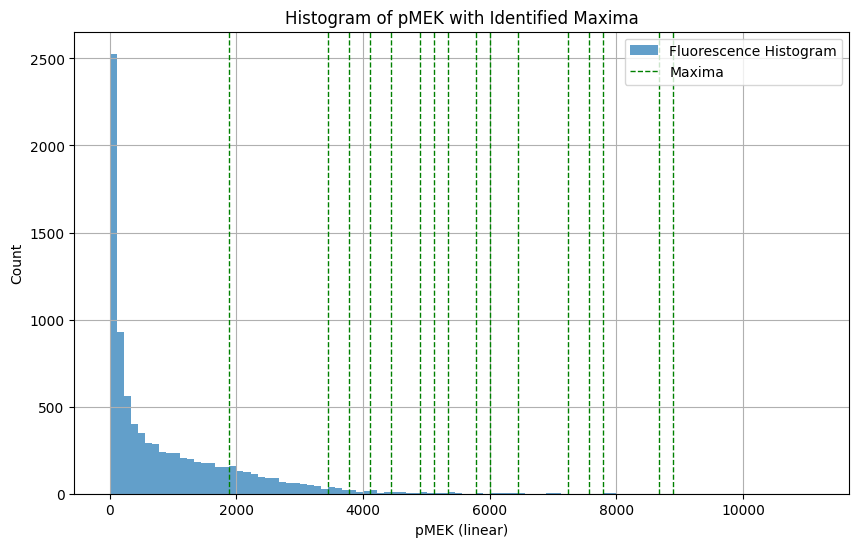

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(x_pos, bins=100, alpha=0.7, label='Fluorescence Histogram')
for mv in maxima_fluorescence_values:
    plt.axvline(mv, color='green', linestyle='--', linewidth=1, label='Maxima' if mv == maxima_fluorescence_values[0] else "")
plt.xlabel('pMEK (linear)')
plt.ylabel('Count')
plt.title('Histogram of pMEK with Identified Maxima')
plt.legend()
plt.grid(True)
plt.show()

## Final Task

Summarize the findings regarding the number and locations of the histogram maxima.


## Summary:

### Q&A
The number of identified maxima is 16.
The exact fluorescence values of these maxima are approximately: 1890.74, 3447.72, 3781.36, 4115.00, 4448.64, 4893.18, 5115.45, 5337.72, 5782.27, 6004.54, 6449.09, 7227.05, 7560.68, 7782.95, 8663.86, and 8886.13.

### Data Analysis Key Findings
5.6b) How many Maxima does it have? where are they located? Are there any data points that cannot be represented this way?
*  A total of 16 local maxima were identified in the `counts_x` array, representing peaks in the fluorescence histogram.
*   The fluorescence values corresponding to these maxima were extracted from `edges_x`, with examples including 1890.74, 3447.72, and 8886.13.
*   The identified maxima were successfully visualized on the histogram using vertical dashed green lines at their respective fluorescence values.
* Yes- there are some data points that cannot be represented on a log10 scale, anything that is less than or equal to 0 (there are 569 of them)

5.6c) If your graphs appear qualitatively different, what could be the reason? Do you think there are two distinct subpopulations of cells?
* There are two major reasons why the graphs look different; the scale distortion fromt he transformation, in the linear x, the low intensity region is concentrated into a smaller area near zero. Whereas in the log10(x), the low region is streatched out so structures become visible. The other reason is that transformation changes the PDF. Similarly to 5.5, you are changing the coordinante system and the estimated PDF vs. the new coordinate which can show different features much more clearly.
* Based on the Log10 histogram, there are two strong peaks which is consistant with two subpopulations, but there is a possibility of there being a mixture of two subpopulations or artifact/ measurment effects.



### Insights or Next Steps
*   The presence of multiple distinct maxima suggests the possibility of different cell populations or states, each characterized by a specific fluorescence intensity. Further analysis could involve clustering these populations or investigating the biological meaning of each peak.
*   To refine the analysis, consider advanced peak detection algorithms that might account for noise or closely spaced peaks, such as those that involve smoothing or curve fitting, especially if the current simple neighbor comparison might miss broader peaks or identify spurious ones due to minor fluctuations.
